In [111]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [112]:
#importing more necessary libraries
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

In [62]:
#Loading orginal dataframe 
o_data = pd.read_csv('kc_house_data.csv')
o_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [63]:
#Viewing the shape and size of the dataframe
o_data.shape

(21597, 21)

In [64]:
#Viewing columns
o_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [65]:
len(o_data.columns)

21

In [66]:
#Viewing the descriptive statistics of the dataset
o_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [67]:
#Checking for null values
o_data.isnull().count()

id               21597
date             21597
price            21597
bedrooms         21597
bathrooms        21597
sqft_living      21597
sqft_lot         21597
floors           21597
waterfront       21597
view             21597
condition        21597
grade            21597
sqft_above       21597
sqft_basement    21597
yr_built         21597
yr_renovated     21597
zipcode          21597
lat              21597
long             21597
sqft_living15    21597
sqft_lot15       21597
dtype: int64

In [68]:
loc_data = o_data[['lat', 'long']]

In [69]:
loc_data.head()

,lat,long
0,47.5112,-122.257
1,47.7210,-122.319
2,47.7379,-122.233
3,47.5208,-122.393
4,47.6168,-122.045


In [70]:
o_data['zipcode'].isnull().count()

21597

In [71]:
data = o_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'zipcode', 'price']]

In [72]:
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,zipcode,price
0,3,1.00,1180,5650,1.0,7,98178,221900.0
1,3,2.25,2570,7242,2.0,7,98125,538000.0
2,2,1.00,770,10000,1.0,6,98028,180000.0
3,4,3.00,1960,5000,1.0,7,98136,604000.0
4,3,2.00,1680,8080,1.0,8,98074,510000.0


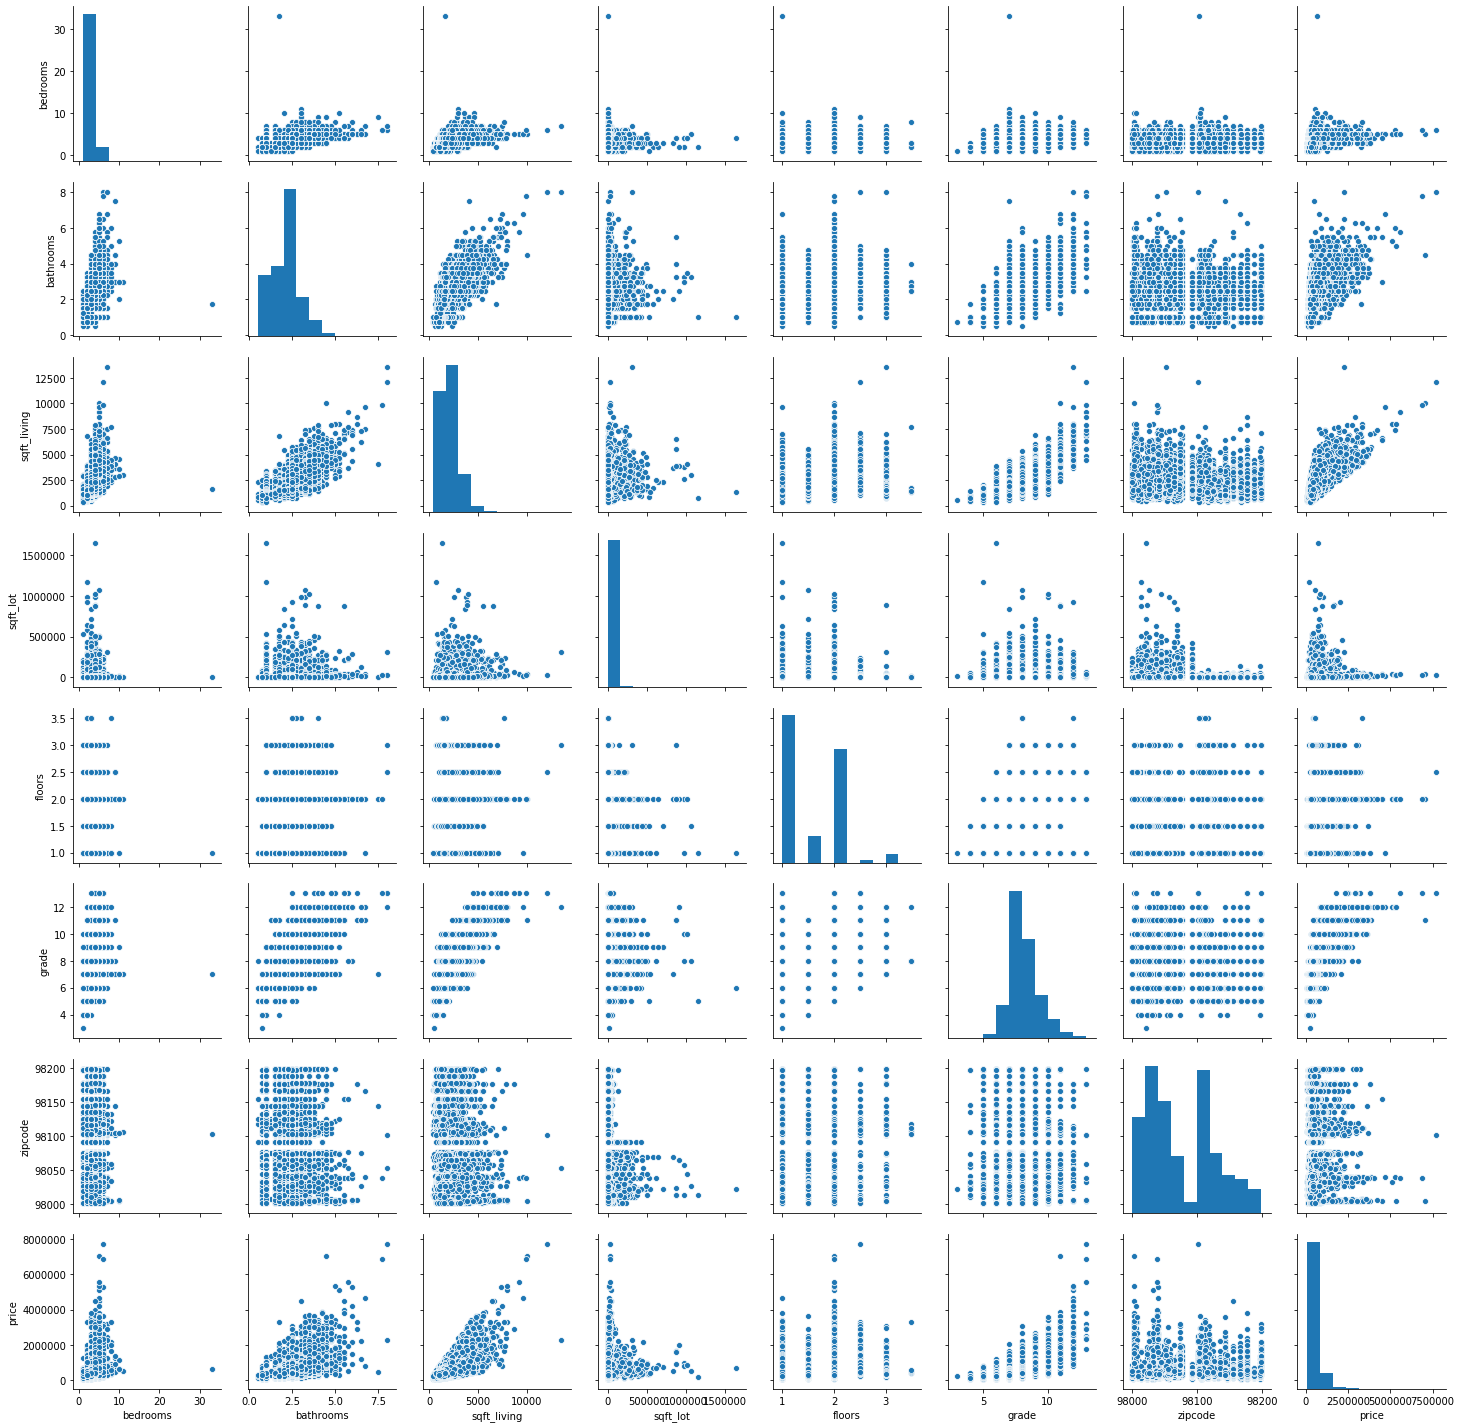

In [73]:
sns.pairplot(data)

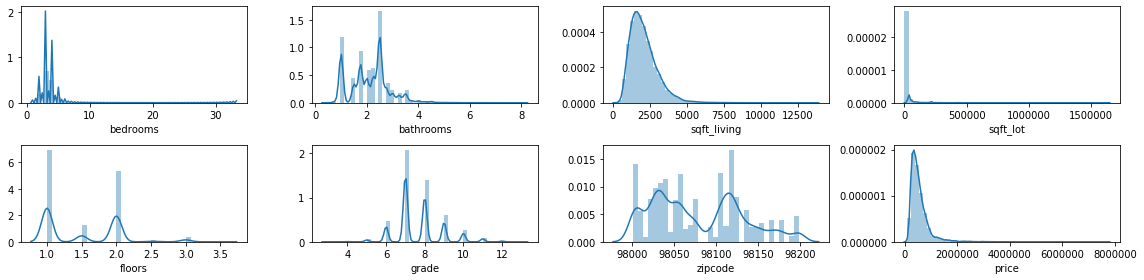

In [74]:
rows = 2
cols = 4

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (16,4))
col = data.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]], ax = ax[i][j])
        index += 1

plt.tight_layout()

In [75]:
corrmat = data.corr

In [76]:
corrmat()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,zipcode,price
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,0.356563,-0.154092,0.308787
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.665838,-0.204786,0.525906
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.762779,-0.199802,0.701917
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.114731,-0.129586,0.089876
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.458794,-0.059541,0.256804
grade,0.356563,0.665838,0.762779,0.114731,0.458794,1.000000,-0.185771,0.667951
zipcode,-0.154092,-0.204786,-0.199802,-0.129586,-0.059541,-0.185771,1.000000,-0.053402
price,0.308787,0.525906,0.701917,0.089876,0.256804,0.667951,-0.053402,1.000000


In [77]:
type(corrmat())

pandas.core.frame.DataFrame

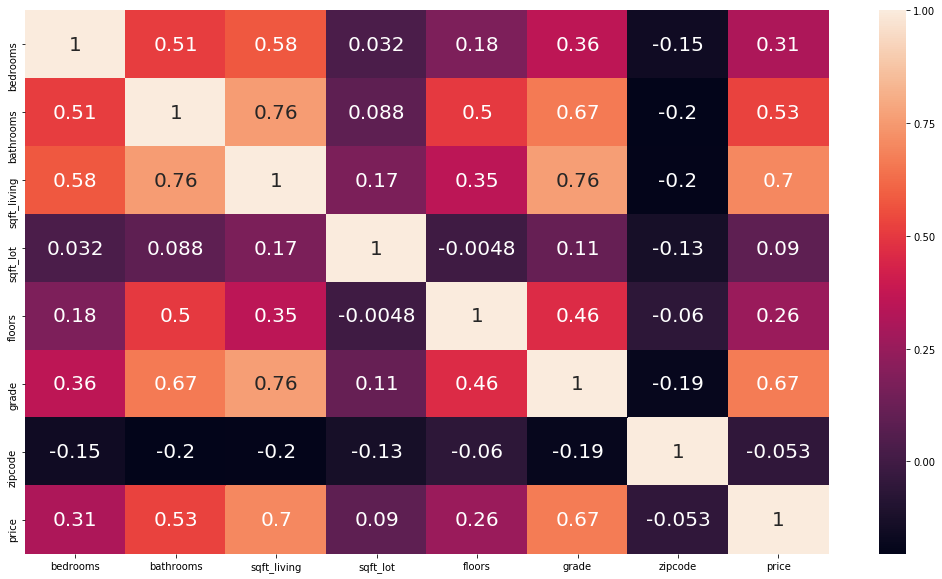

In [78]:
fig, ax = plt.subplots(figsize = (18,10))
plt = sns.heatmap(corrmat(), annot = True, annot_kws ={'size':20})

In [79]:
corrmat().index.values

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'grade', 'zipcode', 'price'], dtype=object)

In [80]:
def getCorrelationFeatures(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    df = pd.DataFrame(data = value, index = feature, columns = ['Corr Value'])
    return df

In [44]:
threshold = 0.5
corr_value = getCorrelationFeatures(corrmat()['price'], threshold)
corr_value

,Corr Value
bathrooms,0.525906
sqft_living,0.701917
grade,0.667951
price,1.000000


In [81]:
corr_value.index

Index(['bathrooms', 'sqft_living', 'grade', 'price'], dtype='object')

In [82]:
correlated_data = data[corr_value.index]
correlated_data.head()

,bathrooms,sqft_living,grade,price
0,1.00,1180,7,221900.0
1,2.25,2570,7,538000.0
2,1.00,770,6,180000.0
3,3.00,1960,7,604000.0
4,2.00,1680,8,510000.0


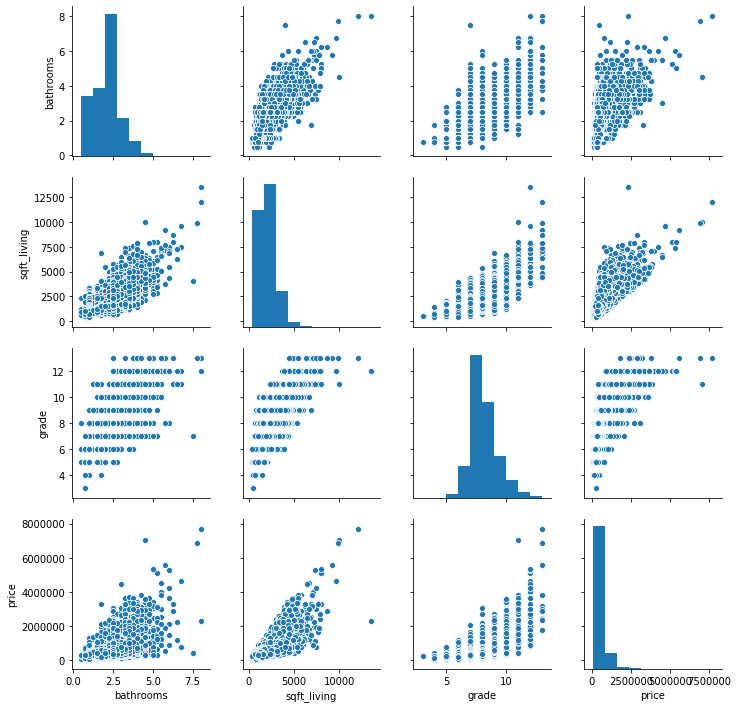

In [51]:
sns.pairplot(correlated_data)

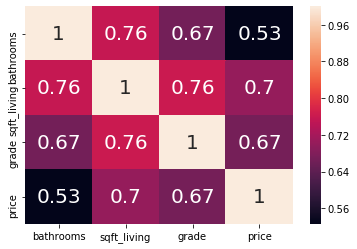

In [83]:
plt = sns.heatmap(correlated_data.corr(), annot = True, annot_kws = {'size':20})

In [84]:
X = correlated_data.drop(labels = ['price'], axis = 1)
y = correlated_data['price']
X.head()

,bathrooms,sqft_living,grade
0,1.00,1180,7
1,2.25,2570,7
2,1.00,770,6
3,3.00,1960,7
4,2.00,1680,8


In [85]:
X.shape

(21597, 3)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [87]:
X_train.shape, X_test.shape

((17277, 3), (4320, 3))

In [88]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
y_predict = model.predict(X_test)

In [90]:
df = pd.DataFrame(data = [y_predict, y_test])

In [93]:
#0 predicted values
#1 actual values
df.T.head()

,0,1
0,1.019291e+06,650000.0
1,5.690308e+05,625000.0
2,9.803980e+05,822500.0
3,2.055172e+05,179900.0
4,8.793408e+05,370000.0


In [99]:
correlated_data.columns.values

array(['bathrooms', 'sqft_living', 'grade', 'price'], dtype=object)

In [100]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print('r2_score: ', score)
print('mae: ', mae)
print('mse: ', mse)

r2_score:  0.5236356475434574
mae:  161180.4223665728
mse:  56076411416.08098


In [106]:
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
mae_value = []
mse_value = []

In [107]:
def performance_Metric(features, threshold, y_true, y_pred):
    score = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    
    total_features.append(len(features)-1)
    total_features_name.append(str(features))
    selected_correlation_value.append(threshold)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    metric_dataframe = pd.DataFrame(data = [total_features_name, total_features,
                                             selected_correlation_value,
                                             r2_scores, mae_value, mse_value], 
                                             index = ['Features', '# of Features', 'Corr Value',
                                             'R2 Score', 'MAE', 'MSE'])
    return metric_dataframe.T

In [108]:
performance_Metric(correlated_data, threshold, y_test, y_predict)

,Features,# of Features,Corr Value,R2 Score,MAE,MSE
0,bathrooms sqft_living grade pric...,21596,0.5,0.523636,161180,5.60764e+10


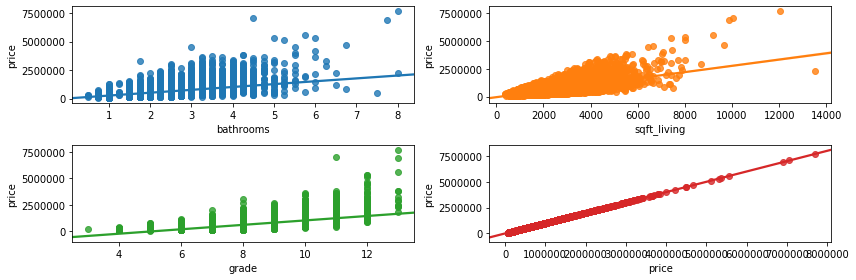

In [115]:
rows = 2
cols = 2

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (12,4))
col = correlated_data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x = correlated_data[col[index]], y = correlated_data['price'], ax = ax[i][j])
        index += 1

plt.tight_layout()

In [169]:
cols_list

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'grade',
 'zipcode']

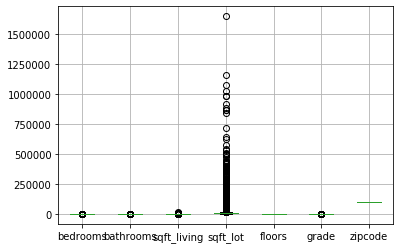

In [170]:
data.boxplot(cols_list)